"""INTRODUKSJON
Dette prosjektet vil ta for seg oppgaver angående Virrevandrere og deres bevegelser gjennom vev og tumorer. 
Vi vil også ta en titt på kodekjøring og dens tidsbruk og hvordan å få gjort kode til å kjøre raskere.

For oppgave 1, er det hovedsaklig bevegelsene til virrevandrerne i en og to dimensjoner som skal sees på.
Kjernekoden vil være forklart grundig i oppgave 1b og 1c, mens de videre oppgavene vil bruke denne kjernekoden og bygge videre rundt på,
hvor endringer eller avvik vil kommenteres for å tydeligjøre hva som skjer i den gitte oppgavne.

I oppgave 2 skal virrevandrerne fremstilles som realistiske bevegelser i menneskekroppen, gjennom vev og tumorer. 
her skal det implementeres at bevegelsene til virrevanedrerne vil endre seg om den entrer tumoren. 
vandrerne er avhengig av diffusjonskonstanten til det stoffet det er inni, og i tumorene vil dette øke.
Det skal også komme tydelig frem hva som skjer om tumorene overlapper."""

In [1]:
#oppgave 1a
"""Den første oppgaven handler om å benytte oss av de formler og teori som er oppgitt og utlede en løsning på ligning(5) i formleheftet

Fra denne ligningene får vi to svar: (1): t=+-(x^2)/a, (2): t=1
ligning 1 får vi fra den matemtiske utregningen, mens t=1 for vi fra deduktiv utregning ved at hvis man tar den første-og andre deriverte 
av t=1 og setter inn i ligningen vil vi ende opp med 0=0 og dermed må t=1 være en mulig lønsing for ligningen.
"""

'Den første oppgaven handler om å benytte oss av de formler og teori som er oppgitt og utlede en løsning på ligning(5) i formleheftet\n\nFra denne ligningene får vi to svar: (1): t=+-(x^2)/a, (2): t=1\nligning 1 får vi fra den matemtiske utregningen, mens t=1 for vi fra deduktiv utregning ved at hvis man tar den første-og andre deriverte \nav t=1 og setter inn i ligningen vil vi ende opp med 0=0 og dermed må t=1 være en mulig lønsing for ligningen.\n'

In [2]:
#oppgave 2
#Begynner med å importere alle viktige bibliotejer som kan trenges videre gjennom oppgaven
import numpy as np
from matplotlib import pyplot as plt #spare litt tid ved å ikke implementere hele biblioteket
import timeit
from random import randint

#2a) 
def endre_variabel1(input_dx,input_dt):
    
    global dx,dt # gjør dx og dt variableene til globale variabler som gjør at de kan brukes utenom funksjonen
    dx= input_dx
    dt= input_dt
    t_k = np.random.randint(30,45)/100 
    #t_k skl være mellom 0.3-0.45, men randint klarer ikke å ta det som input, derfor deler vi heller på 100 etterpå
    D =((dx)**2)/(2*dt)  #effektiv diffusjonskontsant
    return dx,dt, D, t_k 

    """ Returnerer de gitte variablene 
        slik at om man ønsker å endre variablene kan ma kalle på funksjonen 
        i den gitte oppgaven uten at det endrer tidligere kall
        
        Returnerer også D, fordi den er avhengig av både dx og dt.
    """
endre_variabel1(4*10**-6,0.01)

(4e-06, 0.01, 7.999999999999999e-10, 0.41)

Enkel_virre_bevegelse bruker 0.0289 sekunder
Enkel_virre_bevegelse bruker 0.0351 sekunder
Enkel_virre_bevegelse bruker 0.0325 sekunder


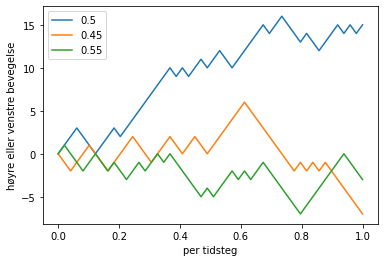

In [3]:
##oppgave 1b
"""
Nå skal den første virrevandreren komme til liv. Her skal bevegelsen vandreren tar
være tilfeldig mellom høyre og venstre. Dette skal skje i en dimensjon. 
I tillegg vil det i slutten av hver oppgave være en kodesnutt som måler tiden det tar å kjøre koden på hver .
Diverse Variabler som går igjen i hele prosjektet, er definert her:

  
          Variabler:
    
    TilfeldigeTall : Lager en liste med tilfeldige tall
    posisjon       : Lager et array med nuller, for å fylles inn med gitte betingelser senere
    tid            : Lager et array med 0-1, med delintervaller M
    pr             : En oppgitt sansynlighetsvariabel, som er den som avgjør virrevandrerens bevegelse
    dx             : Steglengde (for oppgave 1, er dx=1)
    dt             : Tidsteg    (for oppgave 1, er dt=dx=1)
    M              : Hvor stor eller hvor mange ganger 'i' skal kjøre
    N              : Antall virrevandrere
    m              : Antall tumorer
"""
    
endre_variabel1(1,1)
#Oppgitt i oppgaven skal dx=dt=1, så henter dette fra den tidligere funksjonen"
 
def Enkel_virre_bevegelse(M,pr):
    #oppretter 3 arrays for posisjon, tid og en lsite med tileldige tall"
    
    """Posisjon: Foreløpig er posisjonen ukjent, så vi trenger et tomt array med bare nuller
       som senere skal fylles inn
       Deretter lages et tilsvarende stort array som har lik lengde som posisjonsarrayet,
       for å kunne ta hensyn til hvor vandreren befinner seg pr tid
       Tid : for å lage bevegelsen til vandreren trenger vi at for
       hver gang den skal bevege seg skal velge mellom høyre eller venstre"
    """
    TilfeldigeTall = np.random.uniform(0,1,M) 
    posisjon       = np.zeros(M)             
    tid            = np.linspace(0, 1, M)
    for i in range (1,M): #Vi velger at den skal bevege seg M ganger, og må dermed sjekke posisjonen for hver gang
        
        """
        Går gjennom lista med tilfeldige tall og sjekker om posisjonen er større eller lik pr
        Hvis den er større så vil det trekkes fra dx og bevege seg til høyre
        Hvis den er mindre vil den legges til dx vl den bevege seg til venstre.
        """
        if TilfeldigeTall[i] < pr:
            posisjon[i] = posisjon[i-1] + dx  #Denne vil bevege seg til venstre
        else:
            posisjon[i] = posisjon[i-1] - dx  #Denne vil bevege seg til høyree
    
    print("Enkel_virre_bevegelse bruker",round(timeit.timeit(),4),"sekunder")
    return tid, posisjon

#Oppgave 1c

"""
Plotter for de 3 oppgitte testverdiene for pr[ 0.5, 0.45, 0.55] og plotter dem hver for seg
plotter funksjonen med verdier, og akser som gir mening
plt.show() for å vise dem som 3 separate grafer
"""

tid1, posisjon1 = Enkel_virre_bevegelse(50,0.5)
tid2, posisjon2 = Enkel_virre_bevegelse(50,0.45)
tid3, posisjon3 = Enkel_virre_bevegelse(50,0.55)

plt.plot(tid1,posisjon1,label="0.5")
plt.plot(tid2,posisjon2,label="0.45")
plt.plot(tid3,posisjon3,label="0.55")
plt.legend()
plt.xlabel("per tidsteg")
plt.ylabel("høyre eller venstre bevegelse")
plt.show()


Den blå grafen viser sansynlighet 0.5. Hvis man kjører plottet flere ganger er det tilfeldig om den blå linja vil gå opp eller ned rundt verdien 0. 
Men vil ikke ha store avvik i y-retning bort fra verdien 0. 

Amplituden til p=0.45 og p=0.55, vil variere mer og grafen følger dermed lengre ned for 0.55(venstre) og oppover for 0.45(høyre). 

Hvis sansnlgiheten øker/minker vil grafene ha større amplitude i y-retning.
Dermed kan man se at grafene kan være representative for bevegelsene til virrevandrerne.

N_virrevandrere bruker 0.0357 sekunder


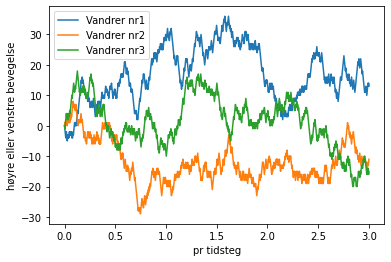

In [82]:
#oppgave 1d
"""Denne oppgaven gjenbruker mye av den forrige funksjon
    men for et antall N, virrevandrere samtidig
"""

def N_virrevandrere(M,pr,N): 
    """
    Legger til en ekstra for_loop for å sjekke 
    for de ekstra N virrevandrerne
    deretter gjentar man på den forrige funksjonen
    for hver enkelt virrevandrer
    """
    posisjon = np.zeros((N ,M))
    tid      = np.linspace(0,N,M)
    
    for i in range (0,N): #Går gjennom en loop for et N antall virrevandrere
            
        TilfeldigeTall = np.random.uniform(0,1,M)
        #Kopierer inn fra forrige oppgave innenfor loopen 
        for j in range (1,M):
            if TilfeldigeTall[j] < pr:
                posisjon[i][j] = posisjon[i][j-1] + dx
            else:
                posisjon[i][j] = posisjon[i][j-1] - dx
 
    print("N_virrevandrere bruker",round(timeit.timeit(),4),"sekunder")               
    return tid, posisjon

tid,posisjon = N_virrevandrere(1000,0.5,3) #returnerer funksjonen for å kunne plotte, økes N øker antall virrevandrere

plt.xlabel("pr tidsteg")
plt.ylabel("høyre eller venstre bevegelse")
plt.plot(tid,posisjon[0],label="Vandrer nr1") # Velger N = 3 og plotter for 3 virrevandrere.
plt.plot(tid,posisjon[1],label="Vandrer nr2") # Vandrerne har samme betingelser, men varierer stort
plt.plot(tid,posisjon[2],label="Vandrer nr3") # For å plotte flere, kunne man tatt plottet inn i en for-loop, eller bare kopiere inn for pos[4] osv.
plt.legend()
plt.show()

Ettersom sansynligheten for bevegelsene er den samme for alle virrevandrerne er det helt tilfeldig hvilken som varierer mest bort fra 0. For en kjøring med et stort antall N, ville figuren gått mot en rettere strek. 

N_virrevandrere_raskere bruker 0.0239 sekunder


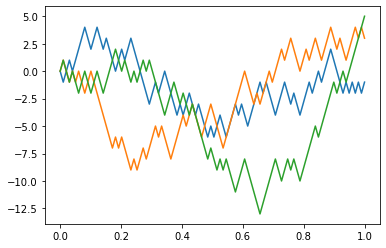

In [223]:
#oppgave 1e - øke hastigheten
"""
I denne oppgaven skal vi gjøre koden raskere, dette kan vi gjøre ved å kjøre funksjonen cumsum().
i tillegg er det mulig å kalle på @jit
eller å endre for loop til while loop, dette gir en liten tidsendring som skal gjøre den raskere.
"""

def N_virrevandrere_raskere(M,pr,N):

    posisjon = np.zeros((N ,M))
    tid      = np.linspace(0, 1, M)
    
    np.cumsum(posisjon) #implementerer cumsum() for å øke hastigheten på koden
    i=0
    while i<N: #Går gjennom en loop for et N antall virrevandrere
            
        TilfeldigeTall = np.random.uniform(0,1,M)
        
        for j in range (1,M):
            if TilfeldigeTall[j] < pr:
                posisjon[i][j] = posisjon[i][j-1] + dx
            else:
                posisjon[i][j] = posisjon[i][j-1] - dx
        i+=1
        
    print("N_virrevandrere_raskere bruker",round(timeit.timeit(),4),"sekunder")
    return tid, posisjon

tid, posisjon = N_virrevandrere_raskere(100,0.5,3)

plt.plot(tid, posisjon[0])
plt.plot(tid, posisjon[1])
plt.plot(tid, posisjon[2])
plt.show()


In [224]:
#Sammenligning av kjøretid
N_virrevandrere_raskere(1000,0.5,1000)
N_virrevandrere_raskere(1000,0.5,1000)
N_virrevandrere_raskere(1000,0.5,1000)
N_virrevandrere_raskere(1000,0.5,1000)
N_virrevandrere_raskere(1000,0.5,1000)

N_virrevandrere(1000,0.5,1000)
N_virrevandrere(1000,0.5,1000)
N_virrevandrere(1000,0.5,1000)
N_virrevandrere(1000,0.5,1000)
N_virrevandrere(1000,0.5,1000)


N_virrevandrere_raskere bruker 0.0257 sekunder
N_virrevandrere_raskere bruker 0.0246 sekunder
N_virrevandrere_raskere bruker 0.0308 sekunder
N_virrevandrere_raskere bruker 0.0262 sekunder
N_virrevandrere_raskere bruker 0.0405 sekunder
N_virrevandrere bruker 0.0317 sekunder
N_virrevandrere bruker 0.029 sekunder
N_virrevandrere bruker 0.0289 sekunder
N_virrevandrere bruker 0.0304 sekunder
N_virrevandrere bruker 0.0244 sekunder


(array([   0.        ,    1.001001  ,    2.002002  ,    3.003003  ,
           4.004004  ,    5.00500501,    6.00600601,    7.00700701,
           8.00800801,    9.00900901,   10.01001001,   11.01101101,
          12.01201201,   13.01301301,   14.01401401,   15.01501502,
          16.01601602,   17.01701702,   18.01801802,   19.01901902,
          20.02002002,   21.02102102,   22.02202202,   23.02302302,
          24.02402402,   25.02502503,   26.02602603,   27.02702703,
          28.02802803,   29.02902903,   30.03003003,   31.03103103,
          32.03203203,   33.03303303,   34.03403403,   35.03503504,
          36.03603604,   37.03703704,   38.03803804,   39.03903904,
          40.04004004,   41.04104104,   42.04204204,   43.04304304,
          44.04404404,   45.04504505,   46.04604605,   47.04704705,
          48.04804805,   49.04904905,   50.05005005,   51.05105105,
          52.05205205,   53.05305305,   54.05405405,   55.05505506,
          56.05605606,   57.05705706,   58.05805

For et antall kjøringer vil i gjennomsnitt N_virrevandrere_raskere være raskere enn N_virrevandrere. 
Dette fordi while_loop kjører raskere enn for_loops, og cumsum() også gjør koden raskere. 

For et stort nummer N=1000 er det stort nok til å anta at denne gjennomsnitlig kodetidenen er et godt estimat for kjøretiden

N_virrevandrere bruker 0.0296 sekunder


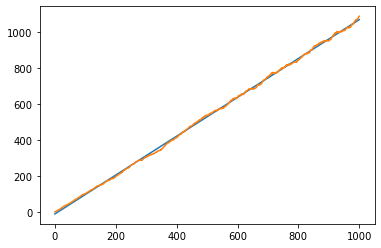

In [46]:
from scipy.optimize import curve_fit 
#trenger denne bare for denne oppgaven og importer da heller den i denne oppgaven istedenfor på toppen, dette sparer tid

#henter variabler som kan være globale for alle funksjonskall for denne oppgaven.
N = 1000
M = 1000
pr = 0.5
#henter tid og posisjon fra virrevandreroppgaven, med de tilfeldige bevegelsene
tid, posisjon = N_virrevandrere(M,pr,N) #

def emp_var(posisjon,N,M): #definerer en funksjon empirisk varians
    posisjon_trans = posisjon.transpose() #transponerer arrayet
    emp_var = np.zeros(M) #lager et tomt array
    for i in range(0,M):
        emp_var[i] = np.var(posisjon_trans[i]) #fyller inn arrayet med de transponerte verdiene
    return emp_var

emp_var = emp_var(posisjon,N,M) #returnerer funksjonen sånn det kan plottes

def func(x,a,b):
    #Oppretter en rett linje til sammenligning med den empiriske variansen
    return x*a + b


popt, pcov = curve_fit(func, tid, emp_var) #curve_fit finner den mest optimale linja for dem
plt.plot(tid,func(tid,*popt))

plt.plot(tid,emp_var)
plt.show() #viser dem begge i samme bilde


Den blå linja viser func() og representerer en standard rett linje x=y og den oransje linja viser curve_fit.

Vi kan se at selv om variansen varierer opp og ned
så ser vi at stigningstallet følger godt den rette linja. Som vil si at variansen ikke varierer stort. Dette stemmer godt med at den skal følge en funksjon som varierer 50/50, og dermed vil i teorien ta annenhver gang høyre/venstre og da i prinsippet ikke ha stor varians, med mindre sansynligheten endrer seg opp eller ned ifra 0.5
og plottet til en rett linje(oransj). Som vil si at siden linjene er såpass like så er stigningstallet det samme.

Stigningstallet til x=y er rett og slett 1, og dermed blir stigningstallet til den empiriske variansen = 1

Svaret fra oppgave 1a var todelt, det ene svaret var 1, som da stemmer veldig godt med den nummeriske løsningen. 
Løsning nummer to var ikke like godt i samsvar med nummerisk løsning. 

Om man skulle gjentatt forsøket ville en økning i N gi en mer og mer nøyaktig løsning. Økes antall virrevandrere, minker sansynlighet for avvik fra den teoretiske vedien 1. Men for en økning i antall tidsteg, vil det bare gi flere målinger av de "samme" virrevandrerne.

Tar man 10 virrevandrere og 1000 tidsteg, vil det være stor sansynlighet for at vandrerne har avvik og grafen vil ha et stigningstall som ikke ligner den teoretiske.
Gjør man motsatt, og tar 10 tidsteg men 1000 virrevandrere vil dette gi tilnærmet lik den teoretiske x=y linja.

N_virrevandrere_2D bruker 0.0317 sekunder
N_virrevandrere_2D bruker 0.0391 sekunder
N_virrevandrere_2D bruker 0.0416 sekunder


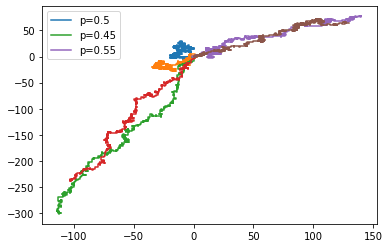

In [47]:
##Oppgave 1g
def N_virrevandrere_2D(M,pr,N):
    #oppretter to tomme arrays med samme dimensjon, 
    pos_x = np.zeros((N,M))
    pos_y = np.zeros((N,M))
    tid = np.linspace(0, 1, M)
    """
    For todimensjonale vandrere vil koden se ganske lik ut,
    men den må gjøre samme opperasjon som i tidligere oppgaver for både vertikal 
    og horisontal bevegelse.
    Først vil den sjekke om den skal gå vertikalt eller horisontalt. 
    Deretter sjekke om den skal til høyre eller venstre.
    """
    for i in range(0,N): 
        #lager to nye lister med tilfeldigetall.
        TilfeldigeTall1 = np.random.uniform(0,1,M)
        TilfeldigeTall2 = np.random.uniform(0,1,M)

        for j in range (1,M): #sjekker for hver bevegelse om det tilfeldigetallet er mindre eller større(standard bevegelsen)
            #sjekker om bevegelsen er vertikal eller horisontal 
            if TilfeldigeTall1[j] < pr:        
                #sjekker om den skal gå til høyre eller venstre langs x_aksen
                if TilfeldigeTall2[j] < pr: 
                    pos_x[i][j] = pos_x[i][j-1] + dx
                    pos_y[i][j] = pos_y[i][j-1]
                else:
                    pos_x[i][j] = pos_x[i][j-1] - dx
                    pos_y[i][j] = pos_y[i][j-1]

            else: 
                #sjekker om den skal gå til høyre eller venstre langs y_aksen
                if TilfeldigeTall2[j] < pr:
                    pos_y[i][j] = pos_y[i][j-1] + dx
                    pos_x[i][j] = pos_x[i][j-1]
                    
                else:
                    pos_y[i][j] = pos_y[i][j-1] - dx
                    pos_x[i][j] = pos_x[i][j-1]

    print("N_virrevandrere_2D bruker",round(timeit.timeit(),4),"sekunder")
    return tid, pos_x, pos_y

tid, pos_x,pos_y = N_virrevandrere_2D(1000,0.5,10)
tid, pos_x1,pos_y1 = N_virrevandrere_2D(1000,0.30,10)
tid, pos_x2,pos_y2 = N_virrevandrere_2D(1000,0.60,10)

#Plotter for to virrevandrere ved p=0.5
plt.plot(pos_x[0],pos_y[0],label="p=0.5")
plt.plot(pos_x[1],pos_y[1])
#Plotter for to virrevandrere ved p=0.45
plt.plot(pos_x1[0],pos_y1[0],label="p=0.45")
plt.plot(pos_x1[1],pos_y1[1])
#plotter for to virrevandrere ved p=0.55
plt.plot(pos_x2[0],pos_y2[0],label="p=0.55")
plt.plot(pos_x2[1],pos_y2[1])
plt.legend()
plt.show()

Figuren viser 6 forskjellige vandrere, hvor to og to har samme sansynlighet.

For p=0.50; vil de bevege seg som tidlgiere, tilfeldig opp og ned rundt x=0,y=0.\  
For p=0.45; ser man at de er på vei nedover mot venstre.\  
For p=0.55; kan man se at de beveger seg motsatt av 0.45, altså i oppover høyre retning.

Ved å øke sansnylighetene enda mer vil figuren bli tilnærmet lik to rette streker og det er dermed tydelig at figuren og virrevandrerne går mot isotropisk. Dette vil også si at dersom betingelsene for x og y, bevegelsen for virrevandrernene endres, vil uansett virrevandrerne bevege seg på lik måte, men i andre retninger.

In [311]:
#Oppgave 1h
M=100
N=100
tid, pos = N_virrevandrere(M,0.5,N)  #henter en-dimensjonale posisjoner
def n1(M,pos):                       #sjekker for èn dimensjon
    ganger_i_origo = 0
    for j in range(0,N):
        for i in range(0,M):             #sjekker om pos[i] noen gang treffer 0, hvis den gjør det, så har den vært innom origo
            if pos[j][i] == 0: 
                ganger_i_origo += 1
    return ganger_i_origo


tid, pos_x,pos_y = N_virrevandrere_2D(M,0.5,N) #henter to dimensjonale posisjoner

def n2(M,pos_x,pos_y):           #sjekker for 2 dimensjoner
    ganger_i_origo = 0
    for j in range(0,N):
        for i in range(0,M):
            if pos_x[j][i] == 0 and pos_y[j][i] == 0:

                # Denne må sjekke om pos_x og pos_y blir 0 samtidig, da er de i origo og da legges det til i ganger_i_origo
                ganger_i_origo += 1
            
    return ganger_i_origo

print("For",M,"endimensjonale bevegelser returnerer virrevandrerne til origo: ",n1(M,pos)," ganger")
print("For",M,"todimensjonale bevegelser returnerer virrevandrerne til origo: ",n2(M,pos_x,pos_y)," ganger")
print("Koden bruker",round(timeit.timeit(),4),"sekunder")
"""
plt.plot(tid,pos,color = "Green")
plt.title("1D")
plt.plot(tid,np.zeros(len(tid)))
plt.show()
plt.plot(pos_x[0],pos_y[0],color = "Red")
plt.title("2D")
plt.show()"""

N_virrevandrere bruker 0.0354 sekunder
N_virrevandrere_2D bruker 0.0317 sekunder
For 100 endimensjonale bevegelser returnerer virrevandrerne til origo:  799  ganger
For 100 todimensjonale bevegelser returnerer virrevandrerne til origo:  246  ganger
Koden bruker 0.0324 sekunder


'\nplt.plot(tid,pos,color = "Green")\nplt.title("1D")\nplt.plot(tid,np.zeros(len(tid)))\nplt.show()\nplt.plot(pos_x[0],pos_y[0],color = "Red")\nplt.title("2D")\nplt.show()'

Figurene viser bevegelsen til virrevandreren. Med en linje i 0 for den endimensjonale grafen, sånn at det er lettere å se høyre/venstre bevegelse fra origo.

2D figurren ser også ut til å stemme bra med antall ganger i origo, her vil det være langt færre punkter, ettersom det er mye lavere sansynlighet for å returnere tilbake i et punkt, istedenfor en linje.
Gjør rede for valget av M og N. 
Drøft hvordan disse variablene påvirker n(M)

Analytisk løsning for 1D:\
p(x=0,t=1) gir 0 fordi, hvis startpos er 0 kan den ikke komme tilbake til 0 på et steg.\
p(x=0,t=2) = 0.5 fordi valget er uavhengig av det første steget, og dermed må p = 0.5.\
Analytisk løsning for 2D:\
p(x=0,t=1) gir 0, samme argument\
p(x=0,t=2) vil gi 0.25, fordi det er 4 veier å gå for hver gang, og vært valg er uavhengig.\

For store verdier av N vil både 1D og 2D være mye i origo, men for større verdier av M er det den 1dimensjonale som nyter best fra det, og vil øke mye mer enn 2D. For økning av tidsteg vil mest sansynlig 2D bevege seg lengre og lengre bort og sansynligheten for å komme tilbake igjen til origo blir mindre. Men for flere og flere N vil det være flere muligheter for at bevegelsene tar turen innom origo.
For økning av M øker 1D med 5-10 ganger så mye som 2D, men for økning av N vil forholdet være litt under 2.

Så for å finne de mest gunstige tallene er en litt stor N og M fint. Feks 100,100 fungerer bra, da passer det også utmerket for å plotte. Evnt kan man også bruke 50,40 hvis man vil ha litt mindre tall.

In [37]:
#Oppgave 2b

def Virre_bevegelse_ubundet(M,pr,N): #virrebevegelse uten bunde vegger= N_virevandrer2D?
    dx = 10
    pos_x = np.zeros((N,M))
    pos_y = np.zeros((N,M))
    tid = np.linspace(0, 1, M)
    
    for i in range(0,N):
        TilfeldigeTall1 = np.random.uniform(0,1,M)
        TilfeldigeTall2 = np.random.uniform(0,1,M)

        for j in range (1,M):
            if TilfeldigeTall1[j] < pr:

                if TilfeldigeTall2[j] < pr:
                    pos_x[i][j] = pos_x[i][j-1] + dx
                    pos_y[i][j] = pos_y[i][j-1]
                else:
                    pos_x[i][j] = pos_x[i][j-1] - dx
                    pos_y[i][j] = pos_y[i][j-1]

            else: 
                if TilfeldigeTall2[j] < pr:
                    pos_y[i][j] = pos_y[i][j-1] + dx
                    pos_x[i][j] = pos_x[i][j-1]
                    
                else:
                    pos_y[i][j] = pos_y[i][j-1] - dx
                    pos_x[i][j] = pos_x[i][j-1]

    print("Virre_bevegelse_ubundet bruker",round(timeit.timeit(),4),"sekunder")
    return tid, pos_x, pos_y


tid, pos_x,pos_y = Virre_bevegelse_ubundet(100,0.5,1)


Virre_bevegelse_ubundet bruker 0.0308 sekunder


In [315]:
#Oppgave 2b
#Definerer først en funksjon som holder vandrerne innenfor grid'et
dX=1
def Virre_bevegelse_bundet(M,pr,N): #virrebevegelse med bundet vegger
    endre_variabel1(0.1,1)
    pos_x = np.zeros((N,M))
    pos_y = np.zeros((N,M))
    tid   = np.linspace(0, 1, M)
    
    """
    Denne oppaven handler om at vi nå skal begrense vandrerne
    til å holde seg innenfor det vi har satt som grenseområdet.
    Grensene vil være 0-100 i både x og y retning. Dermed 
    må vi lage en funksjon som sjekker hvor vandrerne er
    og stoppe opp om de ville ha truffet enten 0, eller 100.
    
    Dermed for denne koden, bruker vi standardkoden for vandrerne,
    men legger på en ekstra if setning.
    """
    for i in range(0,N):
        TilfeldigeTall1 = np.random.uniform(0,1,M)
        TilfeldigeTall2 = np.random.uniform(0,1,M)
        for j in range (1,M):
            if TilfeldigeTall1[j] < pr:
                if TilfeldigeTall2[j] < pr:             
                    if pos_x[i][j-1] >= 100: #Sjekker grensebetingelse 1, hvis x_pos blir 100, så må den bli stående.
                        dx = -dX
                    else:
                        dx = dX
                    pos_x[i][j] = pos_x[i][j-1] + dx
                    pos_y[i][j] = pos_y[i][j-1]
                else:               
                    if pos_x[i][j-1] <= 0: #Sjekker grensebetingelse 2, når pos_x=0, da må den også bli stående
                        dx = -dX
                    else:
                        dx = dX
                    pos_x[i][j] = pos_x[i][j-1] - dx
                    pos_y[i][j] = pos_y[i][j-1]
            else:      
                if TilfeldigeTall2[j] < pr:            
                    if pos_y[i][j-1] >= 100: #Sjekker grensebetingelse 1: pos_y=100 for y
                        dx = -dX
                    else:
                        dx = dX
                    pos_y[i][j] = pos_y[i][j-1] + dx
                    pos_x[i][j] = pos_x[i][j-1]
                else:                
                    if pos_y[i][j-1] <= 0: #Sjekker grensebetingelse 2: pos_y=0 for y
                        dx = -dX
                    else:
                        dx = dX
                    pos_y[i][j] = pos_y[i][j-1] - dx
                    pos_x[i][j] = pos_x[i][j-1]
    print("Virre_bevegelse_bundet bruker",round(timeit.timeit(),4),"sekunder")
    return tid, pos_x, pos_y

In [316]:
"""
Definerer en funksjon tumor() som eneste oppgave er å lage to lister med tilfeldig plaserte sentrum.
x_pos[0],y_pos[0] vil være et sentrum feks. Dette vil da være sentrumet til de tumorene som kalles på
"""
def tumor(L,m):
    x_pos =  np.random.uniform(0, L, m)
    y_pos =  np.random.uniform(0, L, m)
    return x_pos, y_pos

Virrevandrer_i_tumor_med_redusert_fart bruker 0.0509 sekunder


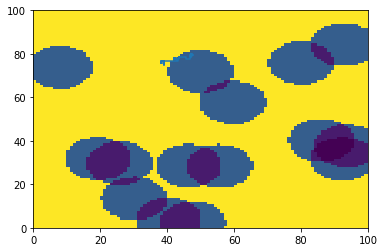

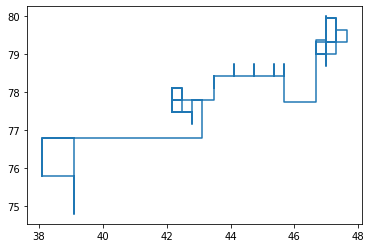

In [368]:
#Dermed slår vi alle funksjonene sammen til funksjonen vi trenger for å løse oppgaven

dX=1
n=100
r=0.002
L=0.02
m=15
t_k=0.1
""" Variabler:

    L   = 0.02
    m   = 15
    r   = 0.002
    t_k = 0.1
    M   = 500 
"""
def virrevandrer_i_tumor_med_redusert_fart(M,pr,N,t_k,a,n,r):
    
    pos_x = np.zeros((N,M))
    pos_y = np.zeros((N,M))
    tid   = np.linspace(0, 1, M)

    for i in range(0,N):
        TilfeldigeTall1 = np.random.uniform(0,1,M)
        TilfeldigeTall2 = np.random.uniform(0,1,M)
        pos_x[i][0] = np.random.randint(0,M)
        pos_y[i][0] = np.random.randint(0,M)
        for j in range (1,M):
            if TilfeldigeTall1[j] < pr:
                if TilfeldigeTall2[j] < pr:
                    if abs(pos_x[i][j-1] - 100) <= 10:
                        dx = -a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1]
                    else:
                        dx = a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1]
                    pos_x[i][j] = pos_x[i][j-1] + dx*10
                    pos_y[i][j] = pos_y[i][j-1]
                else:               
                    if abs(pos_x[i][j-1]) <= 10:
                        dx = -a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1]
                    else:
                        dx = a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1]
                    pos_x[i][j] = pos_x[i][j-1] - dx*10
                    pos_y[i][j] = pos_y[i][j-1]
            else:            
                if TilfeldigeTall2[j] < pr:
                                    
                    if abs(pos_y[i][j-1]-100) <= 10:
                        dx = -a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1]
                    else:
                        dx = a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1]
                    pos_y[i][j] = pos_y[i][j-1] + dx*10
                    pos_x[i][j] = pos_x[i][j-1]
                else:                   
                    if abs(pos_y[i][j-1]) <=10 :
                        dx = -a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1] 
                    else:
                        dx = a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1]
                    
                    pos_y[i][j] = pos_y[i][j-1] - dx*10
                    pos_x[i][j] = pos_x[i][j-1]
    print("Virrevandrer_i_tumor_med_redusert_fart bruker",round(timeit.timeit(),4),"sekunder")
    return tid, pos_x, pos_y

x_pos, y_pos = tumor(L,m)                         #Henter posisjonene til tumoren 
#lag funksjon av dette
x = np.linspace(0,L,M) 
y = np.linspace(0,L,M)
a = np.full((M,M),dx,dtype=float)                  #lager en matrise

grid = np.meshgrid(x,y)                                #lager et sammenslått grid av x og y
xx,yy=grid

for i in range(m):
    under_rot = (xx - x_pos[i])**2+(yy - y_pos[i])**2     #lager en variabel under_rot, sånn at a ser penere ut
    a *= np.where(np.sqrt(under_rot) <= r,np.sqrt(t_k),1) 

    #Np.where finner alle tumor-sentrum og endrer verdien til posisjonen i punktet til t_k
    #der den ikke finner sentrum, endrer den verdien til den gitte posisjonen til 1




tid, pos_x,pos_y = virrevandrer_i_tumor_med_redusert_fart(100,0.5,3,0.2,a,n,r)

plt.pcolormesh(a)
plt.xlim(0,n)
plt.ylim(0,n)
plt.plot(pos_x[0],pos_y[0])#finner plottet virrevandrere
plt.show()
    
plt.plot(pos_x[0],pos_y[0])#finner plottet virrevandrere
plt.show()

In [367]:
def plotter():
    tid1,pos_x1, pos_y1 = Virre_bevegelse_ubundet(M,0.5,N)
    tid2,pos_x2, pos_y2 = Virre_bevegelse_bundet(M,0.5,N)
    virrevandrer_i_tumor(0.02,15,1,0.1,500,1000)
    tid3, pos_x3,pos_y3 = virrevandrer_i_tumor_med_redusert_fart(100,0.5,1,0.1,a,n)


    plt.pcolormesh(a)   #Denne viser frem grid og rutenettet på en slik måte at der a er sentrum vil det 
                        #dannes en kule med radius r rundt sentrum av tumor med en annen farge enn bakgrunnen
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.plot(pos_x1[0],pos_y1[0])
    plt.show()
    plt.plot(pos_x2[0],pos_y2[0])
    plt.show()
    plt.plot(pos_x3[0],pos_y3[0])
    plt.show()
    plt.plot(x_pos[0],y_pos[0])#plotter virrevandrere alene bare for å tydelig ser bevegelsen
    plt.show()
plotter()

Virre_bevegelse_ubundet bruker 0.034 sekunder
Virre_bevegelse_bundet bruker 0.0259 sekunder
Virre_bevegelse_ubundet bruker 0.0333 sekunder
Virre_bevegelse_bundet bruker 0.0259 sekunder
virrevandrer_i_tumor bruker 0.0263 sekunder


TypeError: virrevandrer_i_tumor_med_redusert_fart() missing 1 required positional argument: 'r'

 Lag en funksjon som beregner I(i, j), definert i ligning (12). Funksjonen skal ta
inn dataen fra simuleringen, samt xmin, xmax, ymin, ymax. Ta ogs˚a inn nx og ny slik at
oppløsningen til I kan endres.
Tips: Her kan dere spare mye tid ved ˚a bruke np.histogram2d. Da beregnes I i hele
rutenettet (med nxny ruter). Hvis dere bruker periodiske grensebetingelser eller harde
vegger er det naturlig ˚a relatere xmin, xmax, ymin, ymax til Lx og Ly.

Virrevandrer_i_tumor_med_redusert_fart bruker 0.0307 sekunder
0.5
Virrevandrer_i_tumor_med_redusert_fart bruker 0.0271 sekunder
<class 'numpy.ndarray'>


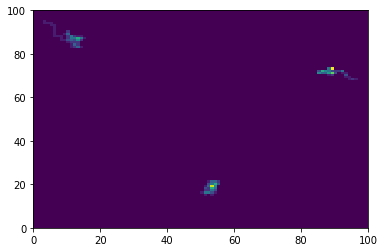

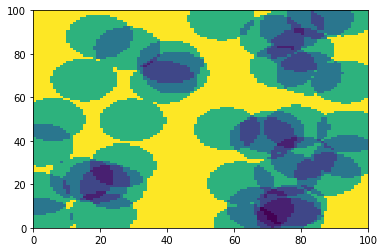

In [364]:


M = 100
N = 500
n = 100
m = 40
t_k = 0.5
r=0.002

x_pos, y_pos = tumor(L,m)

x = np.linspace(0,L,n)
y = np.linspace(0,L,n)
a = np.full((n,n),dx,dtype=float)
grid = np.meshgrid(x,y)
xx,yy=grid

for i in range(m):
    under_rot = (xx - x_pos[i])**2+(yy - y_pos[i])**2
    a *= np.where(np.sqrt(under_rot) <= r,np.sqrt(t_k),1)


tid, pos_x,pos_y = virrevandrer_i_tumor_med_redusert_fart(100,0.5,3,0.2,a,n,r)
    
def I_matrise(pos_x,pos_y,M,N,x_min,x_max,n_x,y_min,y_max,n_y):

    pos_x = np.concatenate(pos_x)
    pos_y = np.concatenate(pos_y)

    x_arr = np.linspace(x_min,x_max,n_x+1)
    y_arr = np.linspace(y_min,y_max,n_y+1)

    I_mat = np.histogram2d(pos_x,pos_y,bins = (x_arr,y_arr))
    I_mat = I_mat[0]/N*M
    print(type(I_mat[0]))
    return I_mat


print(t_k)
tid, pos_x,pos_y = virrevandrer_i_tumor_med_redusert_fart(100,0.5,3,0.2,a,n,r)
#finner plottet virrevandrere

n = 100

plt.pcolormesh(I_matrise(pos_x,pos_y,M,N,0,100,n,0,100,n))
plt.show()

plt.pcolormesh(a)
plt.show()

In [35]:
from matplotlib.image import NonUniformImage
def histo():
    tid, pos_x,pos_y = virrevandrer_i_tumor_med_redusert_fart(100,0.5,1,0.1)
    
    I   = np.histogram2d(pos_x,pos_y)
    I.Transpose()
    I_2 = numbers/(M*N)
    x_edges =np.linspace(N,M)
    y_edges =np.linspace(N,M)
    axis = fig.add_subplot(133, title='NonUniformImage: interpolated',aspect='equal', xlim=xedges[[0, -1]], ylim=yedges[[0, -1]])
    image = NonUniformImage(axis, interpolation='bilinear')
    xcenters = (xedges[:-1] + xedges[1:]) / 2
    ycenters = (yedges[:-1] + yedges[1:]) / 2
    image.set_data(xcenters, ycenters, H)
    ax.images.append(im)
    plt.show()
histo()

virrevandrer_i_tumor_med_redusert_fart bruker 0.0298 sekunder


ValueError: too many values to unpack (expected 2)

Gjør ´en simulering i et system med 10 < m < 25 tumorer, der {tk} er tilfeldig
valgte innenfor intervallet (0.3, 0.45). Bestem selv M, N, L, Lx og Ly, samt størrelsene
p˚a tumorene. Beregn I(i, j) for simuleringen med nx = ny = n = 40 og illustrer
resultatet. Inkluder ogs˚a en figur som viser posisjonen til tumorene slik dere gjorde i
2c). Drøft hvorvidt I(i, j) kan brukes til ˚a detektere tumorenes posisjon og størrelse.
Dette vil i stor grad avhenge av valget deres for M og N, men ogs˚a (i mindre grad)
valget deres for L, Lx og Ly.

0.0308 sekunder


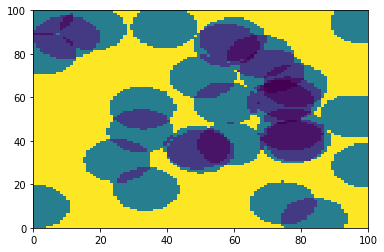

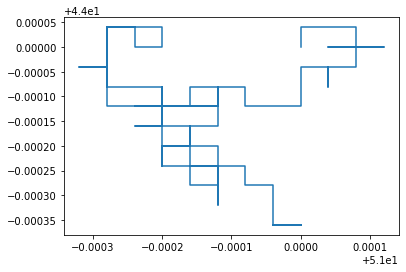

In [8]:
def tumor(L,m):
    x_pos =  np.random.uniform(0, L, m)
    
    y_pos =  np.random.uniform(0, L, m)
    return x_pos, y_pos


M = 100
n = 100
L = 0.02
m = 30
x_pos, y_pos = tumor(L,m)
x = np.linspace(0,L,M)
y = np.linspace(0,L,M)
a = np.full((n,n),dx,dtype=float)
grid = np.meshgrid(x,y)
xx,yy=grid
radius = 0.002
t_k = 0.2





for i in range(m):
    under_rot = (xx - x_pos[i])**2+(yy - y_pos[i])**2
    a *= np.where(np.sqrt(under_rot) <= radius,np.sqrt(t_k),1)
    
    


def appendix5(M,pr,N,a,n):
    
    pos_x = np.zeros((N,M))
    pos_y = np.zeros((N,M))
    tid = np.linspace(0, 1, M)

    for i in range(0,N):
        TilfeldigeTall1 = np.random.uniform(0,1,M)
        TilfeldigeTall2 = np.random.uniform(0,1,M)
        pos_x[i][0] = np.random.randint(0,M)
        pos_y[i][0] = np.random.randint(0,M)
        for j in range (1,M):
 
            if TilfeldigeTall1[j] < pr:
                if TilfeldigeTall2[j] < pr:
                    if abs(pos_x[i][j-1] - 100) <= 10:
                        dx = -a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1]
                    else:
                        dx = a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1]
                    pos_x[i][j] = pos_x[i][j-1] + dx*10
                    pos_y[i][j] = pos_y[i][j-1]
                else:               
                    if abs(pos_x[i][j-1]) <= 10:
                        dx = -a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1]
                    else:
                        dx = a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1]
                    pos_x[i][j] = pos_x[i][j-1] - dx*10
                    pos_y[i][j] = pos_y[i][j-1]
            else:            
                if TilfeldigeTall2[j] < pr:
                                    
                    if abs(pos_y[i][j-1]-100) <= 10:
                        dx = -a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1]
                    else:
                        dx = a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1]
                    pos_y[i][j] = pos_y[i][j-1] + dx*10
                    pos_x[i][j] = pos_x[i][j-1]
                else:                   
                    if abs(pos_y[i][j-1]) <=10 :
                        dx = -a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1] 
                    else:
                        dx = a[int(pos_x[i][j-1]*n/M)-1][int(pos_y[i][j-1]*n/M)-1]
                    
                    pos_y[i][j] = pos_y[i][j-1] - dx*10
                    pos_x[i][j] = pos_x[i][j-1]


    return tid, pos_x, pos_y










print(round(timeit.timeit(),4),"sekunder")



    
tid, pos_x,pos_y = appendix5(M,0.5,3,a,n)


plt.pcolormesh(a)




plt.xlim(0,n)
plt.ylim(0,n)
plt.plot(pos_x[0],pos_y[0])#finner plottet virrevandrere

plt.show()

plt.plot(pos_x[0],pos_y[0])
plt.show()

In [ ]:
#vandrerne blir stuck i tumorene og derofr vises det dårlig i sobefilteret, fordi de bruker laang tid inne i tumorene og får dermed aldri undersøkt hele x,y planet.